# Date:9/28/2022
# Author: Juju Ren, Aayush Bhetuwal, Pinxue Lin 
# Project: Numerical Methods Project 1

# Import libraries

In [3]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#define an empty pandas.dataframe
df = pd.DataFrame(columns=['theta', 'x', 'y', 'f(θ)'])

# 1. Defining a function for theta

The parameters L1, L2, L3,γ, x1, x2, y2 are fixed constants, and the strut lengths p1, p2, p3 will be known for a given pose.
<br>For a given pose, let us set the strut length p1 =p2 =p3 =√5.
<br>The shape of the triangle is defined by L1 = 2, L2 =L3 =√2, γ =π/2.
<br>x1 = 4, x2 = 0, y2 = 4 

In [4]:
#p1 =p2 =p3 =√5. The shape of the triangle is defined by L1 = 2, L2 =L3 =√2, γ =π/2.
#x1 = 4, x2 = 0, y2 = 4
def f(theta): 
    L1 = 2
    L2 = L3 = math.sqrt(2)
    
    gama = math.pi/2
    x1 = 4
    x2 = 0
    y2 = 4
    p1 = p2 = p3 = math.sqrt(5)
    
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gama)-x2
    B3 = L2*math.sin(theta+gama)-y2
    
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    
    x = N1/D
    y = N2/D
    
    result = N1**2+N2**2-(p1**2)*(D**2)
    result = round(result, 6)
    #if(result == 0):                                 #when result == 0, store data in dataframe\
    return (result,x,y)

# 1.1 Creating a pandas.series Object 

In [5]:
#Create a pandas.Series object
def createLineData(theta,x,y,fTheta):
    TmpDf = pd.Series({
              'theta': theta,
              'x': x, 'y': y,
              'f(θ)': fTheta})
    return(TmpDf)

# 1.2 Storing the Data in the data frame

In [6]:
#store data in df
def addData(TmpDf,df):
    df.loc[len(df)] = TmpDf

# 1.3 Testing the value of theta from -pi to pi and
# find the thata value which can make f(theta) == 0

In [7]:
# create a list of values from -pi, pi
testTheta = np.arange(-math.pi,math.pi,math.pi/100)                     # testTheta stores the value of theta
fTheta_List = []                                                        # use fTheta_List to store the values of f(theta) corresponds to values in testTheta
for i in testTheta:
    ftheta, x, y = f(i)
    fTheta_List.append(ftheta)
    if (ftheta == 0):                                                   # if f(theta) == 0, store it in df
            temp = createLineData(i,x,y,ftheta)
            addData(temp,df)

# 1.4 We can see the values where f(theta) == 0 have been stored

In [8]:
#just when f(θ) == 0, the data will be stored
print(df)

      theta    x    y  f(θ)
0 -0.785398  1.0  2.0   0.0
1  0.785398  2.0  1.0  -0.0


# 2. Draw a curve from -pi to pi of f(theta)

Plot f (θ) on [−π, π]. You may use the @ symbol as described in Appendix B.5 to assign
a function handle to your function file in the plotting command.

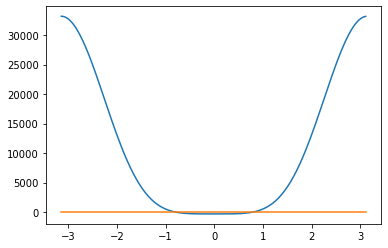

In [9]:

def DrawCurve(xValue,yValue):
    plt.plot(xValue,yValue)
    plt.plot(xValue,[0]*len(xValue))
    plt.show()
DrawCurve(testTheta,fTheta_List)


# 3.Define and use a function to draw poses

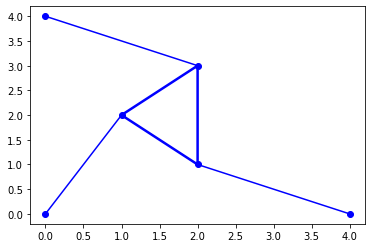

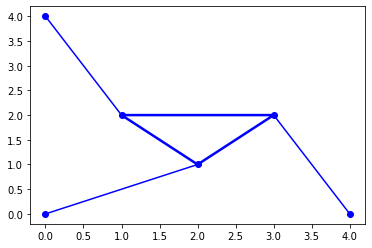

In [10]:
def draw_triangle(x,y,x1,y1,x2,y2,L2,L3,theta,gamma):
    u1=x                                                                        #u is x-axis coordinate of triangle
    u2=x+L2*math.cos(theta+gamma)
    u3=x+L3*math.cos(theta)
    v1=y                                                                        #v is y-axis coordinate of triangle
    v2=y+L2*math.sin(theta+gamma)
    v3=y+L3*math.sin(theta)
    plt.plot([u1, u2, u3],[v1, v2, v3], 'bo')                                   #draw points of triangle
    plt.plot([u1, u2, u3, u1],[v1, v2, v3, v1], 'b', linewidth=2.5)             #draw lines of triangle
    plt.plot([0,x1, x2],[0, 0, y2],'bo')                                        # draw point of struts
    plt.plot([u1, 0], [v1, 0],'b')                                              # draw lines of struts
    plt.plot ([u2, x2], [v2, y2],'b')
    plt.plot([u3, x1], [v3, 0],'b')
    plt.show()

draw_triangle(1,2,4,0,0,4,math.sqrt(2),math.sqrt(2),-0.785398,math.pi/2)
draw_triangle(2,1,4,0,0,4,math.sqrt(2),math.sqrt(2),0.785398,math.pi/2)


# 4.1 Define a new f2(theta) function to calculate f(theta) value of question 4

In [11]:
def f2(theta):
    x1=5
    x2=0
    y2=6
    L1=3
    L2=3*math.sqrt(2)
    L3=3
    gama=math.pi/4
    p1=5
    p2=5
    p3=3
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gama)-x2
    B3 = L2*math.sin(theta+gama)-y2
    
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    
    result = N1**2+N2**2-(p1**2)*(D**2)

    x = N1/D
    y = N2/D
    return (result,x,y)

# 4.1 Show the f2(theta)'s trendency from -pi to pi

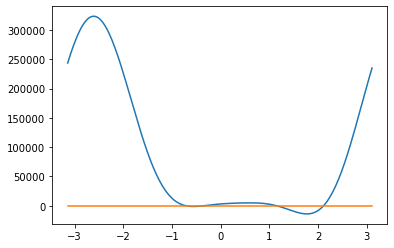

In [12]:
fTheta_List2 = []
for i in testTheta:
    ftheta, _, _ = f2(i)
    fTheta_List2.append(ftheta)
DrawCurve(testTheta,fTheta_List2)

# 4.2 Narrow the scope to see clearly

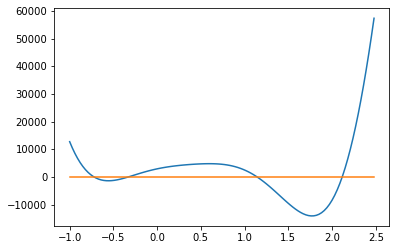

In [13]:
testTheta2 = np.arange(-1,2.5,0.03)
fTheta_List3 = []
for i in testTheta2:
    ftheta, _, _ = f2(i)
    fTheta_List3.append(ftheta)
DrawCurve(testTheta2,fTheta_List3)

#### We can find that it has 4 roots between [-1,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.5]

# 4.3 Use bisection method to find the roots

Function requires to input the accuracy, left end and right end.  
If the value of f(left) < accuracy, it shows that we find the root.

In [14]:
def bisection(accuracy, left, right):
    while True:
        leftF, _, _ = f2(left)
        rightF, _, _ = f2(right)
        if abs(leftF) < accuracy or abs(rightF) < accuracy:     # if we find the root, break out
            break
        else:
            middle = (left + right) / 2                         # else we will calculate the value of middle
            middleF, _, _ = f2(middle)
        
        if (leftF * middleF) < 0:                               # let left or right = middle and ensure they multiply by less than 0
            right = middle
        else:
            left = middle
    print("root = ", left)
    return left
accuracy = 1e-10
root_list = [                                                   # set the accuracy = 1e-10
            bisection(accuracy, -1,-0.5),
            bisection(accuracy, -0.5,0.5),
            bisection(accuracy, 0.5,1.5),
            bisection(accuracy, 1.5,2.5)]

root =  -0.7208492044603929
root =  -0.33100518428409487
root =  1.1436855178213676
root =  2.1159090140864585


# 4.4 Use the roots to draw poses

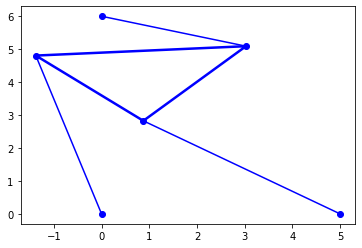

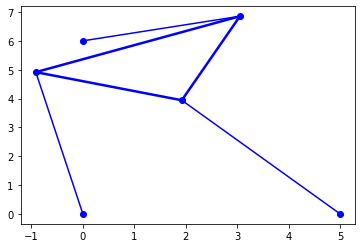

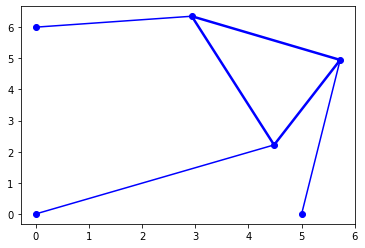

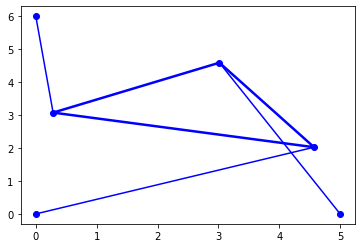

In [15]:
for i in root_list:
    _, x, y = f2(i)
    draw_triangle(x,y,5,0,0,6,3 + math.sqrt(2),3,i,math.pi/4)

# 4.5 Secant Method function

In [16]:
def f3(theta):
    x1=5
    x2=0
    y2=6
    L1=3
    L2=3*math.sqrt(2)
    L3=3
    gama=math.pi/4
    p1=5
    p2=5
    p3=3
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gama)-x2
    B3 = L2*math.sin(theta+gama)-y2

    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    
    result = N1**2+N2**2-(p1**2)*(D**2)

    x = N1/D
    y = N2/D
    return result

In [22]:
def Secant(x1, x2):
    temp = x1 - (f3(x1) / (f3(x1) - f3(x2))) * (x1 - x2)
    x2 = x1
    x1 = temp
    if (abs(f3(x1)) <= 1e-8):
        return x1
    return Secant(x1, x2)

This method require the derivatives at both ends of the interval have the same sign

1.1436855178214103


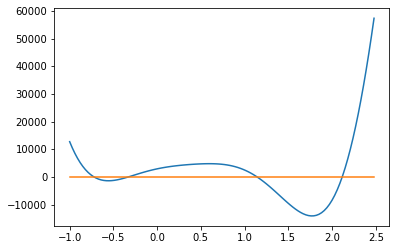

In [23]:
print(Secant(1.5, 2.5))
DrawCurve(testTheta2,fTheta_List3)

We can find that the derivative of f(1.5) is negative and derivative of f(2.5) is positive. If we set 1.5 and 2.5 as the interval's end, the answer will be wrong.

In [19]:
root_list = [
    Secant(-1, -0.5),
    Secant(-0.5, 0.5),
    Secant(0.5, 1.5),
    Secant(2, 2.5)
]
root_list

[-0.7208492044603269,
 -0.3310051842838696,
 1.1436855178213738,
 2.115909014086458]

## 4.6 Newton Method

In [67]:
def f(theta):
    x1=5
    x2=0
    y2=6
    L1=3
    L2=3*math.sqrt(2)
    L3=3
    gama=math.pi/4
    p1=5
    p2=5
    p3=3
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gama)-x2
    B3 = L2*math.sin(theta+gama)-y2

    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    
    result = N1**2+N2**2-(p1**2)*(D**2)

    x = N1/D
    y = N2/D
    return result

def df(theta):
    x1=5
    x2=0
    y2=6
    L1=3
    L2=3*math.sqrt(2)
    L3=3
    gama=math.pi/4
    p1=5
    p2=5
    p3=3
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gama)-x2
    B3 = L2*math.sin(theta+gama)-y2

    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    
    f = N1**2+N2**2-(p1**2)*(D**2)
    N1_d = -3*math.cos(theta)*(9*2**(5/2)*math.sin(theta+math.pi/4)-70)-30*math.sin(theta)*(3*math.sqrt(2)*math.sin(theta+math.pi/4)-6)-27*2**(5/2)*math.sin(theta)*math.cos(theta+math.pi/4)+3*math.sqrt(2)*(30*math.cos(theta)-34)*math.cos(theta+math.pi/4)
    N2_d = -3*math.sin(theta)*(9*2**(5/2)*math.sin(theta+math.pi/4)-70)+3*math.sqrt(2)*(30*math.cos(theta)-34)*math.sin(theta+math.pi/4)+45*2**(3/2)*math.sin(theta)*math.cos(theta+math.pi/4)+9*2**(5/2)*(3*math.cos(theta)-5)*math.cos(theta+math.pi/4)
    D_d = 2*(-3*math.sin(theta)*(3*math.sqrt(2)*math.sin(theta+math.pi/4)-6)+9*math.sqrt(2)*math.sin(theta)*math.sin(theta+math.pi/4)+3*math.sqrt(2)*(3*math.cos(theta)-5)*math.cos(theta+math.pi/4)-9*math.sqrt(2)*math.cos(theta)*math.cos(theta+math.pi/4))
    result = 2*N1*N1_d+2*N2*N2_d-50*D*D_d
    x = N1/D
    y = N2/D
    return result
def newtons_method( x ):
    h = f(x) / df(x)
    while abs(h) >= 0.0001:
        h = f(x)/df(x)
         
        # x(i+1) = x(i) - f(x) / f'(x)
        x = x - h
     
    print("The value of the root is : ",
                             "%.16f"% x)

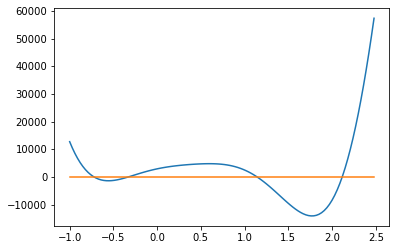

The value of the root is :  -0.7208492141360598
The value of the root is :  -0.3310051841064521
The value of the root is :  -4.1672762924127378
The value of the root is :  2.1159090143418973


In [68]:
DrawCurve(testTheta2,fTheta_List3)
root_list = [
    newtons_method(-1),
    newtons_method(-0.5),
    newtons_method(0.5),
    newtons_method(2)
]


# 5

In [222]:
def f4(theta):
    x1=5
    x2=0
    y2=6
    L1=3
    L2=3*math.sqrt(2)
    L3=3
    gama=math.pi/4
    p1=5
    p2=7
    p3=3
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gama)-x2
    B3 = L2*math.sin(theta+gama)-y2
    
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    
    result = N1**2+N2**2-(p1**2)*(D**2)

    x = N1/D
    y = N2/D
    return (result,x,y)

# 5.1 Show the f4(theta)'s trendency from -pi to pi

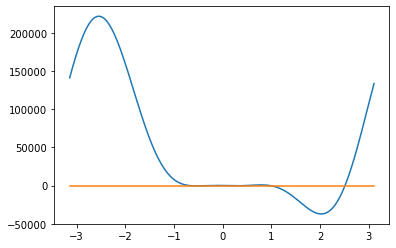

In [223]:
fTheta_List4 = []
for i in testTheta:
    ftheta, _, _ = f4(i)
    fTheta_List4.append(ftheta)
DrawCurve(testTheta,fTheta_List4)

# 5.2 Narrow the scope to see clearly

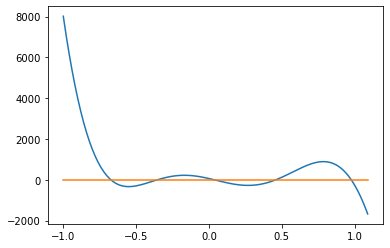

In [224]:
testTheta3 = np.arange(-1,1.1,0.01)
fTheta_List5 = []
for i in testTheta3:
    ftheta, _, _ = f4(i)
    fTheta_List5.append(ftheta)
DrawCurve(testTheta3,fTheta_List5)

# 5.3
### Use bisection method to calculate the root.

In [225]:
def bisection(accuracy, left, right):
    while True:
        leftF, _, _ = f4(left)
        rightF, _, _ = f4(right)
        if abs(leftF) < accuracy or abs(rightF) < accuracy:     # if we find the root, break out
            break
        else:
            middle = (left + right) / 2                         # else we will calculate the value of middle
            middleF, _, _ = f4(middle)
        
        if (leftF * middleF) < 0:                               # let left or right = middle and ensure they multiply by less than 0
            right = middle
        else:
            left = middle
    print("root = ", left)
    return left
accuracy = 1e-8
root_list = [                                                   # set the accuracy = 1e-10
            bisection(accuracy, -1,-0.5),
            bisection(accuracy, -0.5, -0.3),
            bisection(accuracy, -0.3,0.3),
            bisection(accuracy, 0.3, 0.7),
            bisection(accuracy, 0.7, 1.1),
            bisection(accuracy, 1.1, 3),]

root =  -0.673157486373384
root =  -0.3547402705997228
root =  0.037766760573140344
root =  0.45887818104820327
root =  0.9776728949975222
root =  2.5138527993503716


# 5.4
### Draw poses

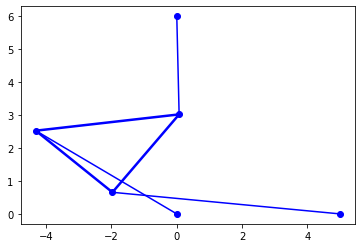

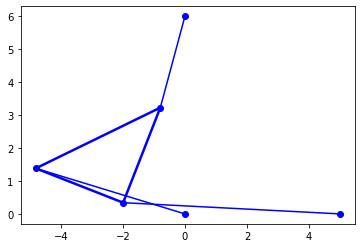

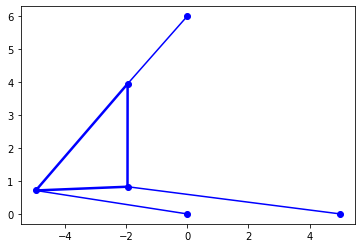

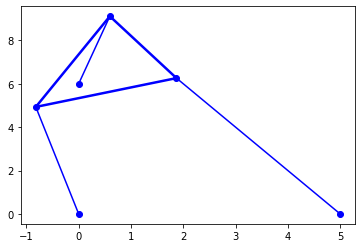

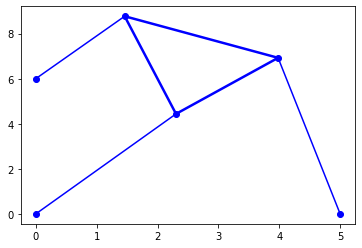

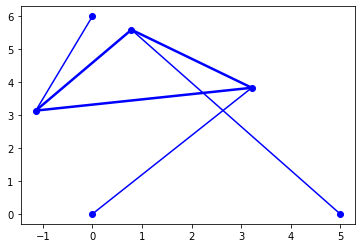

In [226]:
for i in root_list:
    _, x, y = f4(i)
    draw_triangle(x,y,5,0,0,6,3 + math.sqrt(2),3,i,math.pi/4)

# 6,7

In [229]:
p2_list = np.arange(0,10,0.001)                                         # "p2_list" store the values of p2
Theta_list = np.arange(-math.pi,math.pi,math.pi/100)                    # "Theta_list" store the values of theta
p2_count_list = []                                                      # "p2_count_list" store the roots number of p2 which in "p2_list"


### This function should input theta and p2
### the output is f(theta)

In [230]:
def f(theta,p2):
    x1=5
    x2=0
    y2=6
    L1=3
    L2=3*math.sqrt(2)
    L3=3

    gama=math.pi/4
    p1=5
    #p2
    p3=3
    
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gama)-x2
    B3 = L2*math.sin(theta+gama)-y2
    
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    
    result = N1**2+N2**2-(p1**2)*(D**2)

    return result

 ### test all data to calculate the root number of every p2 which in p2_list

In [231]:
for i in p2_list:                                          
    count0 = 0
    len_theta_list = len(Theta_list)
    for p,val2 in enumerate(Theta_list):
        if(p+1 == len_theta_list):
            break
        if(f(val2,i) * f(Theta_list[p+1],i) < 0):
            count0 +=1
    
    p2_count_list.append(count0)

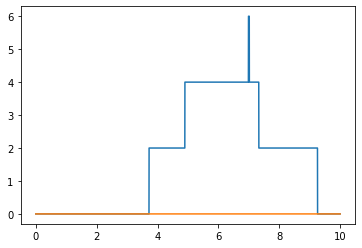

In [232]:
DrawCurve(p2_list,p2_count_list)